In [11]:
#read nii and check the data sturecture
import nibabel as nib
import SimpleITK as sitk
import numpy as np
import os
full_list = os.listdir('/home/dell/data/Dataset/Brats20/ensemble_predict/') 
label_list = []
for names in full_list:
    if names.endswith(".nii.gz"):
        label_list.append(names)
print(len(label_list))
      

166


In [12]:
pwd

'/home/dell/github/nnUNet'

# standard data label conversion for brats submission

In [45]:
def copy_BraTS_segmentation_and_convert_labels_reverse(in_file, out_file):
    # use this for segmentation only!!!
    # nnUNet wants the labels to be continuous. BraTS is 0, 1, 2, 4 -> we make that into 0, 1, 2, 3
    print(in_file)
    img = sitk.ReadImage(in_file)
    img_npy = sitk.GetArrayFromImage(img)

    uniques = np.unique(img_npy)
    for u in uniques:
        if u not in [0, 1, 2, 3]:
            raise RuntimeError('unexpected label')

    seg_new = np.zeros_like(img_npy)
    seg_new[img_npy == 3] = 4
    seg_new[img_npy == 2] = 1
    seg_new[img_npy == 1] = 2
    
#     npResult = result.cpu().numpy()
    ET_voxels = (seg_new == 4).sum()
    if ET_voxels < 100:
        # torch.where(result == 4, result, torch.ones_like(result))
        seg_new[np.where(seg_new == 4)] = 1
    #seg_new[img_npy == 4] = 3
    #seg_new[img_npy == 2] = 1
    #seg_new[img_npy == 1] = 2
    img_corr = sitk.GetImageFromArray(seg_new)
    img_corr.CopyInformation(img)
    sitk.WriteImage(img_corr, out_file)


# the reassign the values to predicted labels
for i in range(len(label_list)):
    label_brats = copy_BraTS_segmentation_and_convert_labels_reverse('/home/dell/data/Dataset/Brats20/predict/'+label_list[i],'/home/dell/data/Dataset/Brats20/submit/'+label_list[i])

/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_098.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_100.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_001.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_013.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_030.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_064.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_010.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_012.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_119.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_125.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_094.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_080.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_016.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_072.nii.gz
/home/dell/data/Data

/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_051.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_089.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_022.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_063.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_036.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_040.nii.gz
/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_112.nii.gz


# Count all segments volume and save as 4d array including case id

In [ ]:
np.array([])

In [18]:
# count all segments volumes
counts_total = np.empty((0,4), int)
for i in range(len(label_list)):

#for i in range(10):
    img = sitk.ReadImage('/home/dell/data/Dataset/Brats20/predict/'+label_list[i])
    img_npy = sitk.GetArrayFromImage(img)
    #print(label_list[i])
    counts = np.array([[np.count_nonzero(img_npy==1),np.count_nonzero(img_npy==2),np.count_nonzero(img_npy==3)]])
    #print(counts, counts.shape)
    counts_dup = np.array([[(img_npy==1).sum(), (img_npy==2).sum(),(img_npy==3).sum()]])
    #print(counts,counts.shape)
    #counts == [(img_npy==1).sum(), (img_npy==2).sum(),(img_npy==3).sum()]
    #counts_dup == [np.count_nonzero(img_npy==1),np.count_nonzero(img_npy==2),np.count_nonzero(img_npy==3)]
    #print(['counts sum',counts])
    #print(['counts_dup sum',counts_dup])
    #assert(counts.all() == counts_dup.all())

    counts_with_id = np.hstack((np.array([[label_list[i]]],dtype=object),counts))
    print(counts_with_id)
    counts_total = np.vstack((counts_total,counts_with_id))
    #counts = np.empty((1,3), int)
    #counts_dup = np.empty((1,3), int)
    

[['BraTS20_Validation_098.nii.gz' 55289 73106 8246]]
[['BraTS20_Validation_100.nii.gz' 151395 60316 35683]]
[['BraTS20_Validation_001.nii.gz' 83332 498 19578]]
[['BraTS20_Validation_013.nii.gz' 63409 806 3878]]
[['BraTS20_Validation_030.nii.gz' 98584 5054 24139]]
[['BraTS20_Validation_064.nii.gz' 46294 10476 26165]]
[['BraTS20_Validation_010.nii.gz' 21691 13045 37898]]
[['BraTS20_Validation_012.nii.gz' 20568 4030 6965]]
[['BraTS20_Validation_119.nii.gz' 76992 5157 11334]]
[['BraTS20_Validation_125.nii.gz' 24466 3981 10727]]
[['BraTS20_Validation_094.nii.gz' 53031 606 18162]]
[['BraTS20_Validation_080.nii.gz' 10951 966 1024]]
[['BraTS20_Validation_016.nii.gz' 27337 10663 7979]]
[['BraTS20_Validation_072.nii.gz' 7445 22581 26]]
[['BraTS20_Validation_120.nii.gz' 37525 10783 19280]]
[['BraTS20_Validation_031.nii.gz' 2586 462 2539]]
[['BraTS20_Validation_049.nii.gz' 23261 11491 17784]]
[['BraTS20_Validation_046.nii.gz' 121506 14847 16392]]
[['BraTS20_Validation_042.nii.gz' 82241 27047 41429

# single case volume finder

In [226]:
counts_total[np.where(counts_total[:,0]=='BraTS20_Validation_076.nii.gz'),:][0]

array([['BraTS20_Validation_076.nii.gz', '101129', '136314', '2959']],
      dtype='<U29')

# binary opening process

In [22]:
from scipy.ndimage import binary_opening, binary_closing,binary_dilation
import matplotlib.pyplot as plt

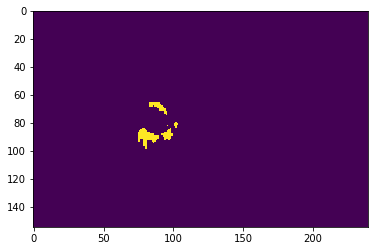

In [23]:
in_file = 'BraTS20_Validation_076.nii.gz'
img = sitk.ReadImage('/home/dell/data/Dataset/Brats20/predict/'+in_file)
img_npy = sitk.GetArrayFromImage(img)
seg_et = np.zeros_like(img_npy)
seg_et[img_npy==3] = 1
plt.imshow(seg_et[:,:,140])
plt.show()

In [25]:
counts = np.empty((0,3), int)

counts_total_open = np.empty((0,4), int)
for i in range(len(label_list)):
    img = sitk.ReadImage('/home/dell/data/Dataset/Brats20/predict/'+label_list[i])
    img_npy = sitk.GetArrayFromImage(img)
    # et
    seg_et = np.zeros_like(img_npy)
    seg_et[img_npy==3] = 1
    seg_et_open = binary_opening(seg_et, structure=np.ones((2,2,2))).astype(int)

    # non e 
    seg_ne = np.zeros_like(img_npy)
    seg_ne[img_npy==2] = 1
    seg_ne_open = binary_closing(seg_ne, structure=np.ones((2,2,2))).astype(int)
  
    # non wt
    seg_wt = np.zeros_like(img_npy)
    seg_wt[img_npy==1] = 1
    seg_wt_open = binary_opening(seg_wt, structure=np.ones((1,1,1))).astype(int)
    counts = np.array([[(seg_wt_open==1).sum(), (seg_ne_open==1).sum(),(seg_et_open==1).sum()]])
    
    #print((seg_et_open==1).sum())
    counts_with_id = np.hstack((np.array([[label_list[i]]],dtype=object),counts))
    print(counts_with_id)
    #print(counts_with_id)
    counts_total_open = np.vstack((counts_total_open,counts_with_id))    
    print(counts_total_open.shape)

[['BraTS20_Validation_098.nii.gz' 55289 73508 7847]]
(1, 4)
[['BraTS20_Validation_100.nii.gz' 151395 60585 34529]]
(2, 4)
[['BraTS20_Validation_001.nii.gz' 83332 509 19512]]
(3, 4)
[['BraTS20_Validation_013.nii.gz' 63409 867 3722]]
(4, 4)
[['BraTS20_Validation_030.nii.gz' 98584 5096 24071]]
(5, 4)
[['BraTS20_Validation_064.nii.gz' 46294 10567 25978]]
(6, 4)
[['BraTS20_Validation_010.nii.gz' 21691 13495 36988]]
(7, 4)
[['BraTS20_Validation_012.nii.gz' 20568 4045 6763]]
(8, 4)
[['BraTS20_Validation_119.nii.gz' 76992 5284 11104]]
(9, 4)
[['BraTS20_Validation_125.nii.gz' 24466 4003 10652]]
(10, 4)
[['BraTS20_Validation_094.nii.gz' 53031 619 18048]]
(11, 4)
[['BraTS20_Validation_080.nii.gz' 10951 998 966]]
(12, 4)
[['BraTS20_Validation_016.nii.gz' 27337 11635 6098]]
(13, 4)
[['BraTS20_Validation_072.nii.gz' 7445 22597 16]]
(14, 4)
[['BraTS20_Validation_120.nii.gz' 37525 11057 18633]]
(15, 4)
[['BraTS20_Validation_031.nii.gz' 2586 466 2425]]
(16, 4)
[['BraTS20_Validation_049.nii.gz' 23261 11

# find the best morphological ops kernel size

In [26]:
a = counts_total_open[np.where(counts_total_open[:,3]<300),:]

In [27]:
a.shape

(1, 23, 4)

In [28]:
counts_total

array([['BraTS20_Validation_098.nii.gz', 55289, 73106, 8246],
       ['BraTS20_Validation_100.nii.gz', 151395, 60316, 35683],
       ['BraTS20_Validation_001.nii.gz', 83332, 498, 19578],
       ['BraTS20_Validation_013.nii.gz', 63409, 806, 3878],
       ['BraTS20_Validation_030.nii.gz', 98584, 5054, 24139],
       ['BraTS20_Validation_064.nii.gz', 46294, 10476, 26165],
       ['BraTS20_Validation_010.nii.gz', 21691, 13045, 37898],
       ['BraTS20_Validation_012.nii.gz', 20568, 4030, 6965],
       ['BraTS20_Validation_119.nii.gz', 76992, 5157, 11334],
       ['BraTS20_Validation_125.nii.gz', 24466, 3981, 10727],
       ['BraTS20_Validation_094.nii.gz', 53031, 606, 18162],
       ['BraTS20_Validation_080.nii.gz', 10951, 966, 1024],
       ['BraTS20_Validation_016.nii.gz', 27337, 10663, 7979],
       ['BraTS20_Validation_072.nii.gz', 7445, 22581, 26],
       ['BraTS20_Validation_120.nii.gz', 37525, 10783, 19280],
       ['BraTS20_Validation_031.nii.gz', 2586, 462, 2539],
       ['BraTS20

In [29]:
counts_total_open.shape

(125, 4)

In [30]:
print('open',counts_total_open[np.where(counts_total_open[:,0]=='BraTS20_Validation_084.nii.gz'),:][0][0])
print('prediction 2',counts_total[np.where(counts_total[:,0]=='BraTS20_Validation_084.nii.gz'),:][0][0])


open ['BraTS20_Validation_084.nii.gz' 41927 51105 334]
prediction 2 ['BraTS20_Validation_084.nii.gz' 41927 50662 429]


In [31]:
img_npy_open = binary_opening(img_npy, structure=np.ones((4,4,4))).astype(int)

# version 1 replace et schme

In [27]:
def copy_BraTS_segmentation_and_convert_labels_replaceet(in_file, out_file):
    # use this for segmentation only!!!
    # nnUNet wants the labels to be continuous. BraTS is 0, 1, 2, 4 -> we make that into 0, 1, 2, 3
    img = sitk.ReadImage(in_file)
    img_npy = sitk.GetArrayFromImage(img)
    uniques = np.unique(img_npy)
    for u in uniques:
        if u not in [0, 1, 2, 3]:
            raise RuntimeError('unexpected label')

    seg_new = np.zeros_like(img_npy)
    seg_et = np.zeros_like(img_npy)
    if img_npy[img_npy == 3].sum()<600 or img_npy[img_npy == 3].sum()/[img_npy[img_npy == 2].sum()]<0.001:
    #if img_npy[img_npy == 3].sum()<1000:
        #print(img_npy ==3)

        print(in_file,img_npy[img_npy == 1].sum(), \
             img_npy[img_npy == 2].sum(),img_npy[img_npy == 3].sum())
        #print('ratio 3/1',img_npy[img_npy == 3].sum()/[img_npy[img_npy == 1].sum()])
        #print('ratio 3/2',img_npy[img_npy == 3].sum()/[img_npy[img_npy == 2].sum()])
        r = round(img_npy[img_npy == 3].sum()**(1./3)*1.5)
        if r<2:
            r=2
        if img_npy[img_npy == 3].sum()>8:
            centriod = np.round(np.argwhere(img_npy==3).mean(axis=0))
            ##print('centroid',centriod)
            patch_npy = img_npy[round(centriod[0])-r:round(centriod[0])+r,round(centriod[1])-r:round(centriod[1])+r,round(centriod[2])-r:round(centriod[2])+r]
            #print(patch_npy[patch_npy==1].sum())
            #print(patch_npy[patch_npy==2].sum())
            if patch_npy[patch_npy==1].sum()>patch_npy[patch_npy==2].sum():
                seg_new[img_npy == 3] = 1
                print('change to 1')
            else:
                seg_new[img_npy == 3] = 2
                print('change to 2')
    else: 
        seg_new[img_npy == 3] = 4
    seg_new[img_npy == 2] = 1
    seg_new[img_npy == 1] = 2
    #seg_new[img_npy == 4] = 3
    #seg_new[img_npy == 2] = 1
    #seg_new[img_npy == 1] = 2
    img_corr = sitk.GetImageFromArray(seg_new)
    img_corr.CopyInformation(img)
    sitk.WriteImage(img_corr, out_file)
    return 

# version 2 replace et scheme, using morphological operations

In [13]:
from scipy.ndimage import binary_opening, binary_closing,binary_dilation
def copy_BraTS_segmentation_and_convert_labels_replaceet_morph(in_file, out_file):
    # use this for segmentation only!!!
    # nnUNet wants the labels to be continuous. BraTS is 0, 1, 2, 4 -> we make that into 0, 1, 2, 3
    img = sitk.ReadImage(in_file)
    img_npy = sitk.GetArrayFromImage(img)
    uniques = np.unique(img_npy)
    for u in uniques:
        if u not in [0, 1, 2, 3]:
            raise RuntimeError('unexpected label')

    seg_new = np.zeros_like(img_npy)
    seg_et = np.zeros_like(img_npy)
    # set up ne and wt first 
    seg_new[img_npy == 2] = 1
    seg_new[img_npy == 1] = 2
    # morp ops for et segment
    
    # closing for ood detection
    seg_et = np.zeros_like(img_npy)
    seg_et[img_npy==3] = 1
    seg_et_open = binary_opening(seg_et, structure=np.ones((2,2,2))).astype(int)
    if (seg_et_open==1).sum()<500:
        print(in_file)

        seg_et_dilation = binary_dilation(seg_et, structure=np.ones((3,3,3))).astype(int)
        patch_npy = img_npy[seg_et_dilation==1]
        print(patch_npy[patch_npy==1].sum(),patch_npy[patch_npy==2].sum())
        if patch_npy[patch_npy==1].sum()>=patch_npy[patch_npy==2].sum():
            seg_new[img_npy == 3] = 1
            print('change to 1')
        else:
            seg_new[img_npy == 3] = 2
            print('change to 2')
    else:
        seg_new[img_npy == 3] = 4
    # 
    
    #seg_new[img_npy == 4] = 3
    #seg_new[img_npy == 2] = 1
    #seg_new[img_npy == 1] = 2
    img_corr = sitk.GetImageFromArray(seg_new)
    img_corr.CopyInformation(img)
    sitk.WriteImage(img_corr, out_file)
    return 

In [ ]:
# get 0 cases: 70 75 82 83 87 96 97 

In [ ]:
# get 1 cases: 72 74 76 77 89 99

In [4]:
# predict 0 score very low: 91(predit 0 but dice very low )
# predict 0 wrong: 88 97 
# predict 0 right: 92 67 85 68
label_brats = copy_BraTS_segmentation_and_convert_labels_replaceet_morph('/home/dell/data/Dataset/Brats20/predict/BraTS20_Validation_084','/home/dell/data/Dataset/Brats20/submit/'+label_list[i])

NameError: name 'i' is not defined

In [15]:
# the reassign the values to predicted labels
for i in range(len(label_list)):
    label_brats = copy_BraTS_segmentation_and_convert_labels_replaceet_morph('/home/dell/data/Dataset/Brats20/ensemble_predict/'+label_list[i],'/home/dell/data/Dataset/Brats20/submit/'+label_list[i])

/home/dell/data/Dataset/Brats20/ensemble_predict/BraTS20_Testing_010.nii.gz
0 248
change to 2
/home/dell/data/Dataset/Brats20/ensemble_predict/BraTS20_Testing_106.nii.gz
0 0
change to 1
/home/dell/data/Dataset/Brats20/ensemble_predict/BraTS20_Testing_107.nii.gz
38 464
change to 2
/home/dell/data/Dataset/Brats20/ensemble_predict/BraTS20_Testing_108.nii.gz
0 0
change to 1
/home/dell/data/Dataset/Brats20/ensemble_predict/BraTS20_Testing_102.nii.gz
0 0
change to 1
/home/dell/data/Dataset/Brats20/ensemble_predict/BraTS20_Testing_006.nii.gz
80 378
change to 2
/home/dell/data/Dataset/Brats20/ensemble_predict/BraTS20_Testing_109.nii.gz
110 162
change to 2
/home/dell/data/Dataset/Brats20/ensemble_predict/BraTS20_Testing_105.nii.gz
0 0
change to 1
/home/dell/data/Dataset/Brats20/ensemble_predict/BraTS20_Testing_103.nii.gz
0 0
change to 1
/home/dell/data/Dataset/Brats20/ensemble_predict/BraTS20_Testing_011.nii.gz
0 0
change to 1
/home/dell/data/Dataset/Brats20/ensemble_predict/BraTS20_Testing_002

In [35]:
# remove small regions in et we look at the submission 
et_outlier = counts_total[counts_total[:,3].astype(np.float)<200]
print(et_outlier[:,0])
#full_list_sub = os.listdir('/home/kun/Desktop/imagesIn_1/submission') 

['BraTS20_Validation_072.nii.gz' 'BraTS20_Validation_088.nii.gz'
 'BraTS20_Validation_103.nii.gz' 'BraTS20_Validation_099.nii.gz'
 'BraTS20_Validation_107.nii.gz' 'BraTS20_Validation_069.nii.gz'
 'BraTS20_Validation_087.nii.gz' 'BraTS20_Validation_082.nii.gz'
 'BraTS20_Validation_091.nii.gz' 'BraTS20_Validation_077.nii.gz'
 'BraTS20_Validation_083.nii.gz' 'BraTS20_Validation_092.nii.gz'
 'BraTS20_Validation_090.nii.gz' 'BraTS20_Validation_067.nii.gz'
 'BraTS20_Validation_085.nii.gz' 'BraTS20_Validation_074.nii.gz'
 'BraTS20_Validation_068.nii.gz' 'BraTS20_Validation_097.nii.gz'
 'BraTS20_Validation_089.nii.gz']


In [345]:
full_list_sub

['BraTS20_Validation_104.nii.gz',
 'BraTS20_Validation_087.nii.gz',
 'BraTS20_Validation_062.nii.gz',
 'BraTS20_Validation_091.nii.gz',
 'BraTS20_Validation_106.nii.gz',
 'BraTS20_Validation_123.nii.gz',
 'BraTS20_Validation_036.nii.gz',
 'BraTS20_Validation_064.nii.gz',
 'BraTS20_Validation_105.nii.gz',
 'BraTS20_Validation_017.nii.gz',
 'BraTS20_Validation_061.nii.gz',
 'BraTS20_Validation_009.nii.gz',
 'BraTS20_Validation_113.nii.gz',
 'BraTS20_Validation_083.nii.gz',
 'BraTS20_Validation_032.nii.gz',
 'BraTS20_Validation_094.nii.gz',
 'BraTS20_Validation_079.nii.gz',
 'BraTS20_Validation_125.nii.gz',
 'BraTS20_Validation_110.nii.gz',
 'BraTS20_Validation_056.nii.gz',
 'BraTS20_Validation_093.nii.gz',
 'BraTS20_Validation_075.nii.gz',
 'BraTS20_Validation_108.nii.gz',
 'BraTS20_Validation_098.nii.gz',
 'BraTS20_Validation_088.nii.gz',
 'BraTS20_Validation_057.nii.gz',
 'BraTS20_Validation_016.nii.gz',
 'BraTS20_Validation_076.nii.gz',
 'BraTS20_Validation_072.nii.gz',
 'BraTS20_Vali

In [32]:
label_list[0]

'BraTS20_Validation_104.nii.gz'

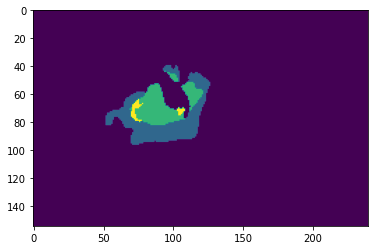

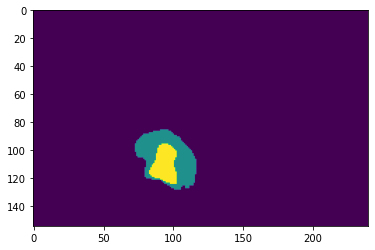

In [30]:
#example figures
import matplotlib.pyplot as plt
for i in range(2):
    img = sitk.ReadImage(label_list[i])
    img_npy = sitk.GetArrayFromImage(img)
    plt.imshow(img_npy[:,:,100])
    plt.show()

In [220]:
#toy example why np.vstack does not work at the frist time.
a= np.array([[(img_npy==1).sum()], [(img_npy==2).sum()],[(img_npy==3).sum()]])

print(a.shape)
print(a.ndim)
a = np.transpose(a)
print(a.shape)
print(a.ndim)
# this is a 2d matrix/ array


b= np.array([(img_npy==1).sum(), (img_npy==2).sum(),(img_npy==3).sum()])
print(b.shape)
print(b)
b = np.transpose(b)
print(b.shape)
print(b)
print(b.ndim)
# this is a 1d vectorm, transpose dont work on 1d vector

(3, 1)
2
(1, 3)
2


In [277]:
counts_with_id = np.hstack((np.array([[label_list[1]]]),counts))
print(counts_with_id)

[['BraTS20_Validation_087.nii.gz' '63692' '38757' '4850']]


In [229]:
counts_total = np.empty((0,4), int)
for i in range(len(label_list)):
#for i in range(10):
    img = sitk.ReadImage(label_list[i])
    img_npy = sitk.GetArrayFromImage(img)
    print(label_list[i])
    counts = np.array([[np.count_nonzero(img_npy==1),np.count_nonzero(img_npy==2),np.count_nonzero(img_npy==3)]])
    print(counts, counts.shape)
    counts_dup = np.array([[(img_npy==1).sum(), (img_npy==2).sum(),(img_npy==3).sum()]])
    print(counts,counts.shape)
    #counts == [(img_npy==1).sum(), (img_npy==2).sum(),(img_npy==3).sum()]
    #counts_dup == [np.count_nonzero(img_npy==1),np.count_nonzero(img_npy==2),np.count_nonzero(img_npy==3)]
    #print(['counts sum',counts])
    #print(['counts_dup sum',counts_dup])
    assert(counts.all() == counts_dup.all())
    counts_with_id = np.hstack((np.array([[label_list[1]]],dtype=object),counts))
    print(counts_with_id)
    counts_total = np.vstack((counts_total,counts_with_id))
    #counts = np.empty((1,3), int)
    #counts_dup = np.empty((1,3), int)
print(counts_total.shape)
    

BraTS20_Validation_104.nii.gz
[[67298 24091  2660]] (1, 3)
[[67298 24091  2660]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 67298 24091 2660]]
BraTS20_Validation_087.nii.gz
[[20929  7456     5]] (1, 3)
[[20929  7456     5]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 20929 7456 5]]
BraTS20_Validation_062.nii.gz
[[ 3212  3374 10938]] (1, 3)
[[ 3212  3374 10938]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 3212 3374 10938]]
BraTS20_Validation_091.nii.gz
[[4204  703    0]] (1, 3)
[[4204  703    0]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 4204 703 0]]
BraTS20_Validation_106.nii.gz
[[22716   550  7890]] (1, 3)
[[22716   550  7890]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 22716 550 7890]]
BraTS20_Validation_123.nii.gz
[[28872  4664  9560]] (1, 3)
[[28872  4664  9560]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 28872 4664 9560]]
BraTS20_Validation_036.nii.gz
[[121803  12339  52674]] (1, 3)
[[121803  12339  52674]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 121803 12339 52674]]
BraTS20_Validation_064.ni

[[66525  6821 29324]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 66525 6821 29324]]
BraTS20_Validation_020.nii.gz
[[29278 22470 41041]] (1, 3)
[[29278 22470 41041]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 29278 22470 41041]]
BraTS20_Validation_014.nii.gz
[[ 8074 18611 17656]] (1, 3)
[[ 8074 18611 17656]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 8074 18611 17656]]
BraTS20_Validation_024.nii.gz
[[29557  6341 20729]] (1, 3)
[[29557  6341 20729]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 29557 6341 20729]]
BraTS20_Validation_109.nii.gz
[[101405   1669  11098]] (1, 3)
[[101405   1669  11098]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 101405 1669 11098]]
BraTS20_Validation_034.nii.gz
[[88579 22927 76201]] (1, 3)
[[88579 22927 76201]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 88579 22927 76201]]
BraTS20_Validation_055.nii.gz
[[65387 11997 34457]] (1, 3)
[[65387 11997 34457]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 65387 11997 34457]]
BraTS20_Validation_066.nii.gz
[[69769  5332  9144]] (1, 3)
[[6

BraTS20_Validation_043.nii.gz
[[44253 20758 37695]] (1, 3)
[[44253 20758 37695]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 44253 20758 37695]]
BraTS20_Validation_037.nii.gz
[[10914  5993 13734]] (1, 3)
[[10914  5993 13734]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 10914 5993 13734]]
BraTS20_Validation_082.nii.gz
[[39301 50757   290]] (1, 3)
[[39301 50757   290]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 39301 50757 290]]
BraTS20_Validation_018.nii.gz
[[34102 13113 23464]] (1, 3)
[[34102 13113 23464]] (1, 3)
[['BraTS20_Validation_087.nii.gz' 34102 13113 23464]]
(125, 4)


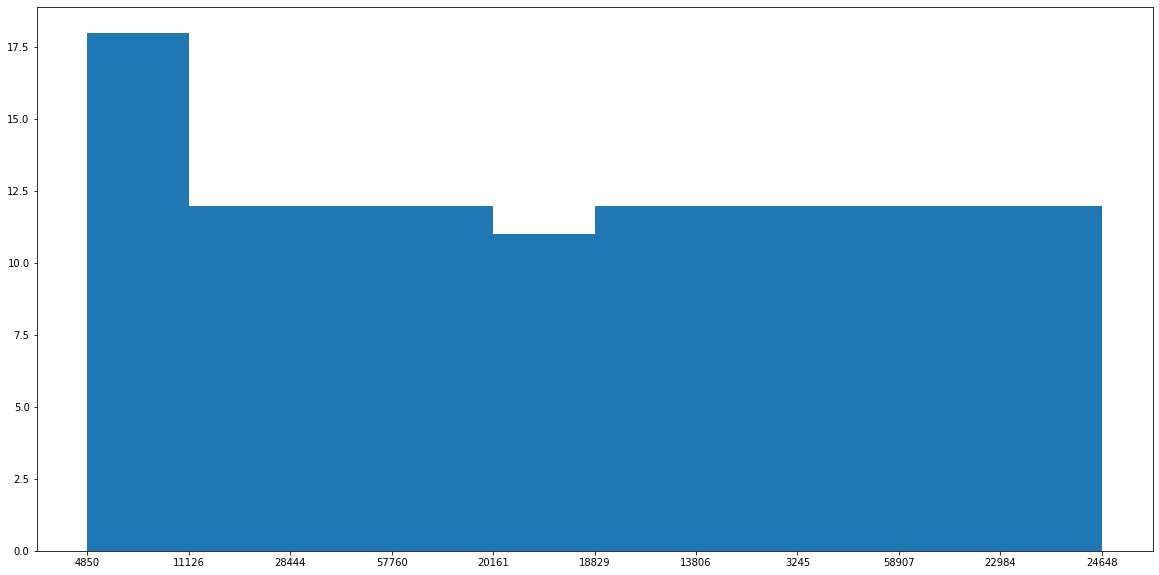

In [303]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
import matplotlib.pyplot as plt
counts_hist, bins, patches= ax.hist(counts_total[:,3],bins = 10)
ax.set_xticks(bins)
plt.show()

In [338]:
et_count.astype(np.float)>1000

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True])

In [341]:
et_outlier = counts_total[counts_total[:,3].astype(np.float)<1000]

In [228]:
# we found a few 0s in the et segmentation scores and consider thats the case we need to drop the et segments
import pandas as pd
df_scores = pd.read_csv('Stats_Validation_final.csv')

In [232]:
df_scores

,Label,Dice_ET,Dice_WT,Dice_TC,Sensitivity_ET,Sensitivity_WT,Sensitivity_TC,Specificity_ET,Specificity_WT,Specificity_TC,Hausdorff95_ET,Hausdorff95_WT,Hausdorff95_TC
0,BraTS20_Validation_001,0.93204,0.86482,0.94066,0.98540,0.78919,0.97799,0.99974,0.99946,0.99978,1.41421,47.43416,1.41421
1,BraTS20_Validation_002,0.87603,0.93454,0.95936,0.96312,0.97735,0.95666,0.99979,0.99963,0.99995,1.41421,2.23607,1.00000
2,BraTS20_Validation_003,0.90508,0.90939,0.95457,0.94959,0.91505,0.96148,0.99986,0.99945,0.99994,1.41421,2.23607,1.00000
3,BraTS20_Validation_004,0.50069,0.91402,0.93421,0.86538,0.90821,0.95281,0.99664,0.99866,0.99909,3.00000,4.58258,4.58258
4,BraTS20_Validation_005,0.84837,0.90060,0.92643,0.83960,0.95835,0.91560,0.99998,0.99893,0.99998,1.00000,3.60555,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Mean,0.71943,0.90391,0.84230,0.74901,0.90861,0.82970,0.99964,0.99915,0.99965,37.89257,7.31674,8.69315
126,StdDev,0.30985,0.06706,0.15623,0.33463,0.08771,0.18866,0.00044,0.00100,0.00046,105.32310,14.93894,18.42653
127,Median,0.84876,0.92290,0.90340,0.90332,0.92848,0.90636,0.99978,0.99946,0.99979,2.00000,3.00000,3.16228
128,25quantile,0.73112,0.88711,0.81555,0.73839,0.88996,0.78955,0.99949,0.99882,0.99958,1.41421,2.00000,1.73205


In [62]:
graylevel, counts= np.unique((img_npy),return_counts= True)
print(counts)

[8851554   69743    4859    1844]


In [401]:
img_npy.shape

(155, 240, 240)

In [474]:
np.argwhere(img_npy==2).mean(axis=0)

array([ 58.24813689, 126.92350129,  87.44387449])

In [501]:
centroid = np.argwhere(img_npy==3).mean(axis=0)
print(centroid)

[ 67.5862069  160.65517241  96.25      ]


[[40080 51661   116]] (1, 3)


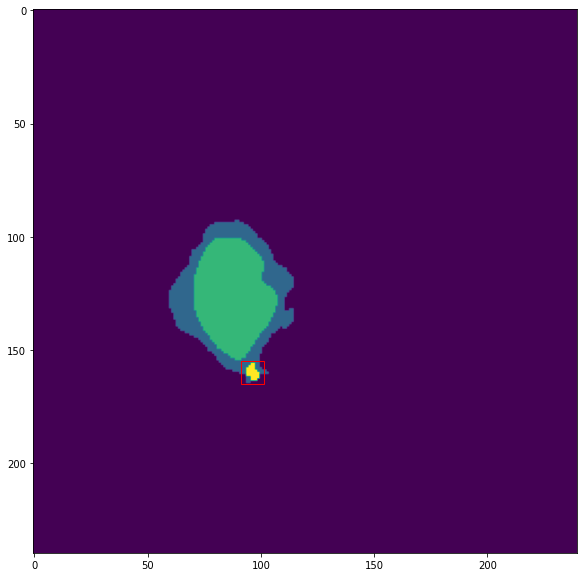

[[1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 3 3 1 1 0]
 [1 1 1 1 3 3 3 1 1 0]
 [1 1 1 3 3 3 3 1 1 1]
 [1 1 1 3 3 3 3 3 1 1]
 [1 1 1 3 3 3 3 3 3 1]
 [0 0 0 3 3 3 3 3 3 0]
 [0 0 0 1 1 3 3 3 3 0]
 [0 0 0 1 1 3 3 3 0 0]
 [0 0 0 1 1 0 0 0 0 0]]


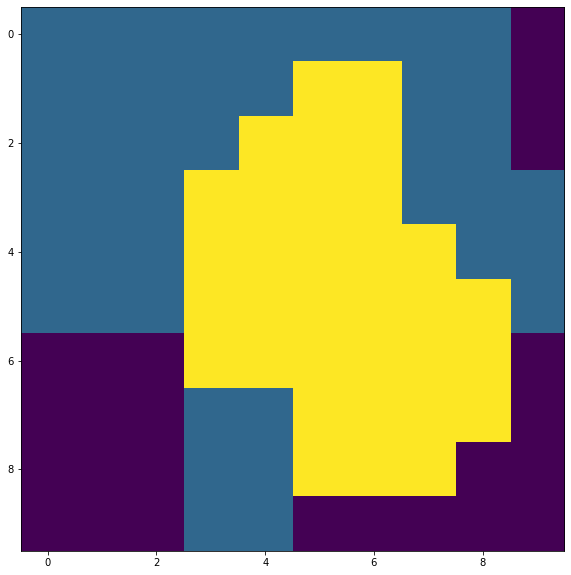

0
43


In [496]:
## this cell tried to figure out et segment outlier using geometry location prior
## hypothesis et should lie within the region of non enhancing
## case 82 is a typical case et splitted into two subregions
nii_dir = '/home/kun/Desktop/imagesIn_1/BraTS20_Validation_082.nii.gz'
img = sitk.ReadImage(nii_dir)
img_npy = sitk.GetArrayFromImage(img)
counts_dup = np.array([[(img_npy==1).sum(), (img_npy==2).sum(),(img_npy==3).sum()]])
print(counts,counts.shape)
import matplotlib.pyplot as plt
figure, ax = plt.subplots(1)
plt.imshow(img_npy[68,:,:])
# get a box 
from matplotlib.patches import Rectangle
centriod = np.argwhere(img_npy[68,:,:]==3).mean(axis=0)
rect = Rectangle([centriod[1]-5,centriod[0]-5],10,10,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

# patch_npy
patch_npy = img_npy[68,round(centriod[0])-5:round(centriod[0])+5,round(centriod[1])-5:round(centriod[1])+5]
print(patch_npy)
plt.imshow(patch_npy)
plt.show()
print((patch_npy==2).sum())
print((patch_npy==1).sum())

In [451]:
np.argwhere(img_npy==3).mean().any()<np.argwhere(img_npy==2).max().any()


False

In [452]:
np.argwhere(img_npy==3).mean()<np.argwhere(img_npy==2).max()

True

In [447]:
print(np.argwhere(img_npy==3).mean(axis=0))
print(np.argwhere(img_npy==2).mean(axis=0))
print(np.argwhere(img_npy==1).mean(axis=0))

[ 67.5862069  160.65517241  96.25      ]
[ 58.24813689 126.92350129  87.44387449]
[ 61.1385479  128.20391717  89.38702595]


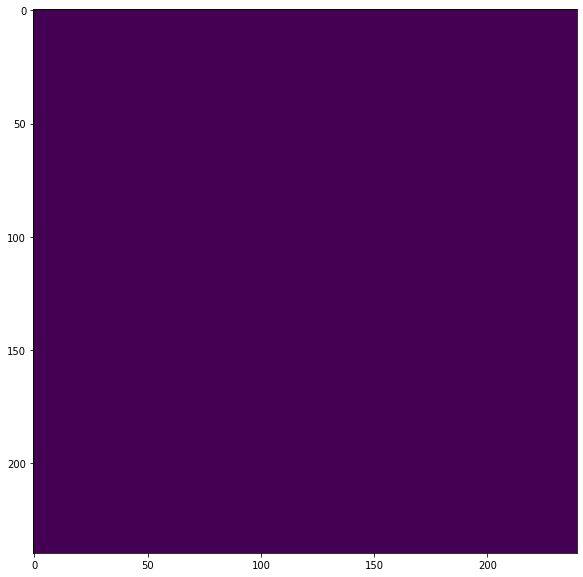

0


In [441]:
# ne only mask
#seg_new[img_npy == 3] = 4
#seg_new[img_npy == 2] = 1
#seg_new[img_npy == 1] = 2
img_ne = np.zeros_like(img_npy)
img_et = np.zeros_like(img_npy)
img_wt = np.zeros_like(img_npy)
## get et and ne overlay
# set edema into background 
img_et[img_npy ==3] =1
img_ne[img_npy ==1] = 0
img_ne[img_npy == 2] = 1
img_wt[img_npy == 1] = 1
img_overlay_et_ne = img_ne*img_et
plt.imshow(img_overlay_et_ne[68,:,:])
plt.show()
sum_ne_overlap = img_overlay_et_ne.sum()
print(sum_ne_overlap)


In [426]:
min_ne = np.argwhere(img_npy==1).min(axis=0)
max_ne = np.argwhere(img_npy==1).max(axis=0)
print(min_ne,max_ne)

print(np.argwhere(img_npy==3).any()>min_ne)
print(np.argwhere(img_npy==3).any()<max_ne)

[37 90 60] [ 83 166 120]
[False False False]
[ True  True  True]


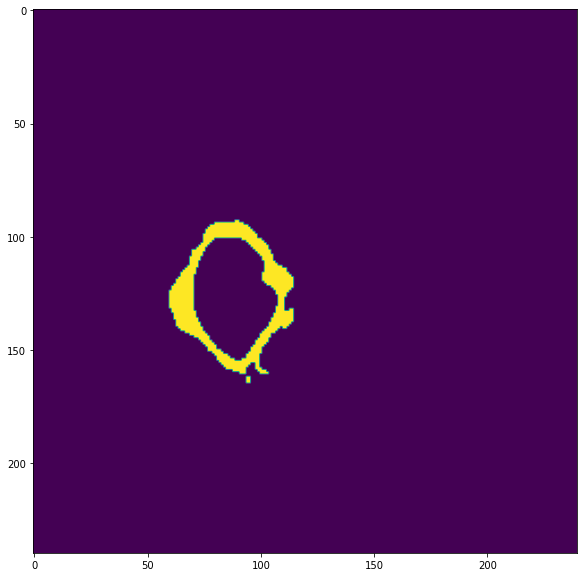

In [445]:
import scipy.ndimage as scind
img_wt_fill = scind.binary_fill_holes(img_wt)
plt.imshow(img_wt_fill[68,:,:])
plt.show()